In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cell_df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

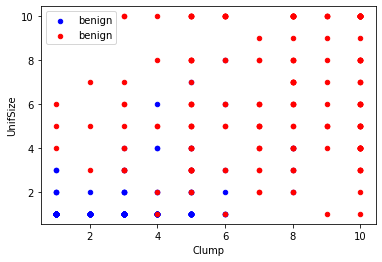

In [5]:
benign_df =cell_df[cell_df['Class']==2][0:200]
malignant_df =cell_df[cell_df['Class']==4][0:200]

axes =benign_df.plot(kind='scatter',x='Clump',y='UnifSize', color='blue', label='benign')

malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='benign' , ax=axes)


In [6]:
cell_df.dtypes

cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
cell_df.columns
feature_df=cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#cell_df 100rows and 11 columns
#picked 9 columns out of 11
#independent var
X =np.asarray(feature_df)
#dependent variable
y =np.asarray(cell_df['Class'])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)
#(546 x 9)
X_train.shape
#(546 x 1)
y_train.shape
#(137 x 9)
X_test.shape
#(137 x 1)
y_test.shape

(137,)

In [9]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

